## Rodrigo Xavier
## Matrícula 569037

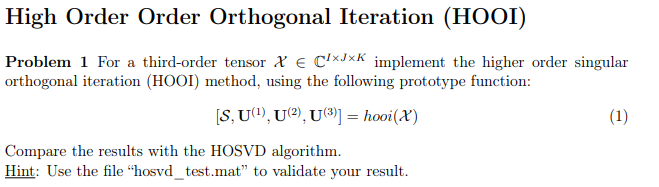

In [3]:
from scipy.io import loadmat

# Testing with hosvd_test file:
mat_file = loadmat(r"C:\Users\Administrador\Documents\Doutorado\Algebra tensorial\Homeworks\matlab files\hosvd_test.mat")

U1 = mat_file['U1']
U2 = mat_file['U2']
U3 = mat_file['U3']
S = mat_file['tenS']
X = mat_file['tenX']

In [8]:
import numpy as np
import tensorly as tl
from fold_unfold import unfold
##############################################################################
# Using tensorly function because I could not implement my own of homework 6 #
##############################################################################
from tensorly.tenalg import multi_mode_dot

def hooi(X, ranks, n_iter=100000, tol=1e-6):
    """   
    Parameters:
    - X: The input tensor (numpy array).
    - ranks: Tuple specifying the desired multilinear rank.
    - n_iter: Number of iterations for optimization.
    - tol: Convergence tolerance.

    Returns:
    - core: The core tensor.
    - factors: List of factor matrices for each mode.
    """
    shape = X.shape
    N = len(shape)

    # Step 1: Initialize factor matrices using HOSVD
    factors = [np.linalg.svd(unfold(X, mode+1))[0][:, :ranks[mode]] for mode in range(N)]

    prev_core = None

    for _ in range(n_iter):
        for mode in range(N):
            # Compute mode-n product while leaving out mode-n matrix
            temp_tensor = multi_mode_dot(X, factors, transpose=True, skip=mode)
            
            # Compute SVD of mode-n unfolding
            U, _, _ = np.linalg.svd(unfold(temp_tensor, mode+1))
            factors[mode] = U[:, :ranks[mode]]  # Keep top singular vectors
        
        # Compute new core tensor
        core = multi_mode_dot(X, factors, transpose=True)

        # Check convergence
        if prev_core is not None and np.linalg.norm(core - prev_core) / np.linalg.norm(core) < tol:
            break
        prev_core = core

    X_hat = multi_mode_dot(core, factors)
    return X_hat

def NMSE(X0, X_hat):
    """
    Calculates the normalized mean square error (NMSE).

    Args:
        X0: Original data matrix.
        X_hat: Reconstructed data matrix.

    Returns:
        NMSE value.
    """
    return np.linalg.norm(X0 - X_hat)**2 / np.linalg.norm(X0)**2

In [7]:
target_ranks = X.shape

# Apply HOOI
X_hat = hooi(X, target_ranks)
print(f'Error between X and X_hat for target ranks {X.shape}: {float(NMSE(X, X_hat))}')

Error between X and X_hat for target ranks (3, 4, 5): 6.167351089177421e-32


O valor do NMSE aqui é próximo do obtido no homework 7 (3.967142920535319e-31)

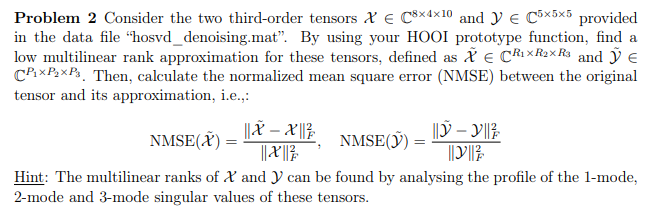

In [48]:
from scipy.io import loadmat

# Testing with hosvd_denoising file:
mat_file = loadmat(r"C:\Users\Administrador\Documents\Doutorado\Algebra tensorial\Homeworks\matlab files\hosvd_denoising.mat")
X = mat_file[ 'tenX_noise']
Y = mat_file[ 'tenY_noise']

print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')

X shape: (8, 4, 10)
Y shape: (5, 5, 5)


In [49]:
# Target multilinear rank for tensor X
target_ranks = (4, 2, 5)

# Apply HOOI
X_hat = hooi(X, target_ranks)

# Target multilinear rank for tensor Y
target_ranks = (1, 1, 1)

# Apply HOOI
Y_hat = hooi(Y, target_ranks)

In [50]:
print(f'Error between X and X_hat: {float(NMSE(X, X_hat))}')
print(f'Error between Y and Y_hat: {float(NMSE(Y, Y_hat))}')

Error between X and X_hat: 0.04578891229842446
Error between Y and Y_hat: 0.020459501286737913
